Accuracy: 97.22%
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        10
           3       1.00      0.90      0.95        10
           4       0.92      1.00      0.96        11
           5       1.00      1.00      1.00        15

    accuracy                           0.97        72
   macro avg       0.98      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



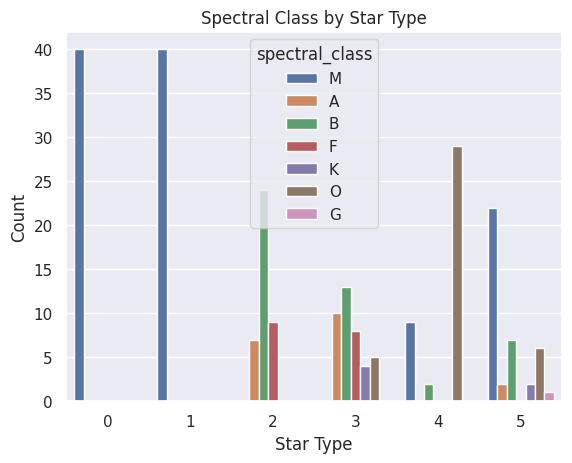

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from category_encoders.one_hot import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set()
#importing
df = pd.read_csv('star_dataset.csv')
#renaming columns
df.columns = ['temperature', 'luminosity', 
              'radius', 'absolute_magnitude', 
              'star_type', 'star_color', 'spectral_class']

df.head()
#dropping 
X = df.drop('star_type', axis= 1)
y = df['star_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
df.head()
#pre processing data
X_train['spectral_class'] = X_train['spectral_class'].map({'M': 0, 'K': 1, 'G': 2, 'F': 3, 'A': 4, 'B': 5, 'O': 6})
X_test['spectral_class'] = X_test['spectral_class'].map({'M': 0, 'K': 1, 'G': 2, 'F': 3, 'A': 4, 'B': 5, 'O': 6})

one_hot = OneHotEncoder(['star_color'], use_cat_names= True)
X_train = one_hot.fit_transform(X_train)
X_test = one_hot.transform(X_test)

#LogReg
lr = LogisticRegression(random_state= 42, max_iter= 4000, C= 1, penalty= 'l2', tol= 1, solver= 'lbfgs')
lr.fit(X_train, y_train)
#predicting values with test data
y_predict = lr.predict(X_test)
#accuracy -checking model matrics
print(f'Accuracy: {round(accuracy_score(y_test, y_predict) * 100, 2)}%')

print(classification_report(y_test, y_predict,zero_division=1))
#predicting with train data
y_pred_train = lr.predict(X_train)

#print(f'Accuracy: {round(accuracy_score(y_test, y_predict) * 100, 2)}%')

#print(classification_report(y_train, y_pred_train,zero_division=1))

# create a new dataframe with the count of each spectral class for each star type
counts_df = df.groupby(['star_type', 'spectral_class']).size().reset_index(name='count')

# create bar plot
sns.barplot(x='star_type', y='count', hue='spectral_class', data=counts_df)
plt.xlabel('Star Type')
plt.ylabel('Count')
plt.title('Spectral Class by Star Type')
plt.show()







In [2]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.9 MB/s eta 0:00:00
